# NLP Challenge: IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis using LSTM

## Importing Libraries

In [21]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [22]:
df = pd.read_csv("./IMDB Dataset.csv")
print(df.shape)

(50000, 2)


In [23]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


## Checking Sentiment Distribution

In [24]:
df["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Encoding Sentiment Labels

In [25]:
df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)

/tmp/ipykernel_31/1137712857.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


## Verifying Encoded Sentiment Distribution

In [26]:
df["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

## Splitting Dataset

In [27]:
from sklearn.model_selection import train_test_split

train, temp = train_test_split(df, test_size=0.20, random_state=42, stratify=df['sentiment'])
val, test = train_test_split(temp, test_size=0.50, random_state=42, stratify=temp['sentiment'])
print(f"Train: {len(train)}, Val: {len(val)}, Test: {len(test)}")

Train: 40000, Val: 5000, Test: 5000


In [28]:
train_data = train
val_data = val
test_data = test

## Tokenizing and Padding

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
# Convert text to sequences and pad
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_val = pad_sequences(tokenizer.texts_to_sequences(val_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

# Target variables
Y_train = train_data["sentiment"].values
Y_val = val_data["sentiment"].values
Y_test = test_data["sentiment"].values

## Building the Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from zipfile import ZipFile

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, Y_val),
    callbacks=[early_stopping]
)

model.summary()

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 130s 203ms/step - accuracy: 0.7296 - loss: 0.5232 - val_accuracy: 0.8476 - val_loss: 0.3506
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.8581 - loss: 0.3443 - val_accuracy: 0.8258 - val_loss: 0.3849
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 201ms/step - accuracy: 0.8591 - loss: 0.3323 - val_accuracy: 0.8700 - val_loss: 0.3140
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 202ms/step - accuracy: 0.8639 - loss: 0.3229 - val_accuracy: 0.8630 - val_loss: 0.3349
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 202ms/step - accuracy: 0.8862 - loss: 0.2785 - val_accuracy: 0.8754 - val_loss: 0.3086
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 203ms/step - accuracy: 0.9112 - loss: 0.2279 - val_accuracy: 0.8716 - val_loss: 0.3126
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 202ms/step - accuracy: 0.9265 - loss: 0.1966 - val_accuracy: 0.8816 - val_loss: 0.2986
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 126s 202ms/step - accuracy: 0.9193 - loss: 0.20

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (64, 200, 128)              │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (64, 64)                    │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (64, 1)                     │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,068,421 (7.89 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,378,948 (5.26 MB)

## Saving the Model

In [31]:
model.save("./sentiment_lstm_model.keras")

## Evaluating the Model on Test set

In [32]:
from tensorflow.keras.models import load_model

model = load_model("./sentiment_lstm_model.keras")

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 74ms/step - accuracy: 0.8789 - loss: 0.3056
Model Loss: 0.3174
Model Accuracy: 0.8714


## Visualizing Accuracy and Loss Over Epochs

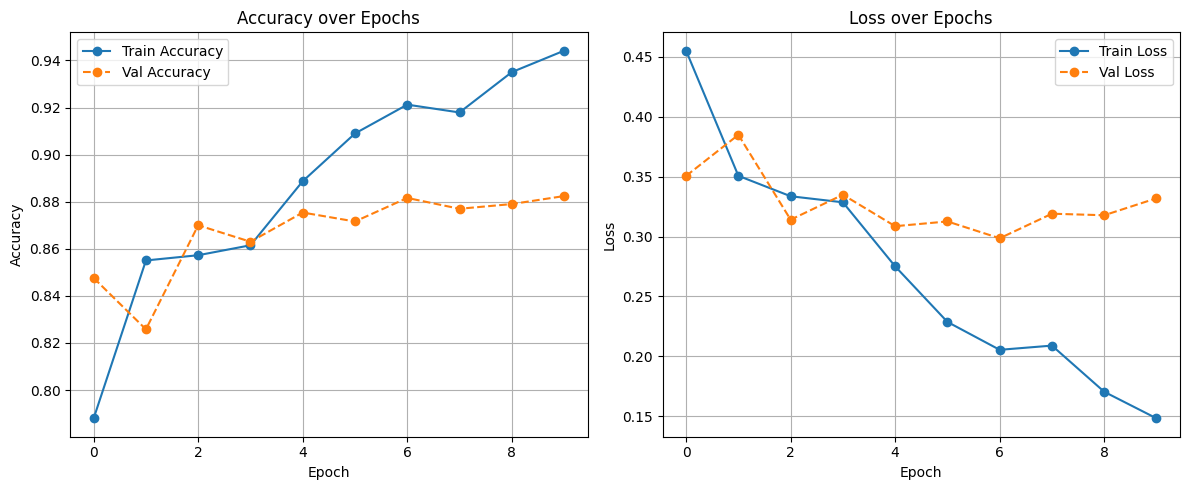

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', linestyle='--', marker='o')  # Dotted line
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', linestyle='--', marker='o')  # Dotted line
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Confusion Matrix

157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 78ms/step


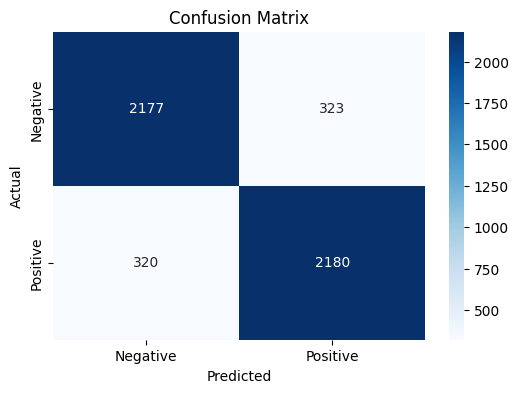

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

cm = confusion_matrix(Y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Predicting Sentiment for User Input

In [35]:
def predict_sentiment(review):
    # Preprocess the review
    review = review.lower().strip()
    # Tokenize and pad
    sequence = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequence, maxlen=200)
    # Predict sentiment
    prediction = model.predict(padded_sequence)
    prob = prediction[0][0]
    sentiment = "positive" if prob > 0.5 else "negative"
    return sentiment, prob

## Example Usage

In [42]:
new_review = "This movie was amazing, I loved it so much!"
sentiment, confidence = predict_sentiment(new_review)
print(f"The sentiment is: {sentiment} (confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
The sentiment is: positive (confidence: 0.98)


In [49]:
new_review = "This movie was average for others, but I really loved it!"
sentiment, confidence = predict_sentiment(new_review)
print(f"The sentiment is: {sentiment} (confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The sentiment is: positive (confidence: 0.93)


In [44]:
new_review = "Disgusting."
sentiment, confidence = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment} (confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
The sentiment of the review is: negative (confidence: 0.12)
